In [1]:
import os
import IPython

from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

import librosa
from librosa.feature import melspectrogram
from librosa.display import specshow
from librosa import power_to_db, get_samplerate, load

# import functions from scripts directory
import sys
sys.path.insert(1, '../../scripts/') # caution: path[0] is reserved for script path (or '' in REPL)

from audio_utils import audio_preprocessing
from spec2png import spec2png

In [2]:
anno_df = pd.read_csv("../../data/annotations.csv")
anno_df['filename'].values[0]
anno_df.head()

,Unnamed: 0,id,diagnosis,train_test,filename,is_healthy
0,0,i101,urti,test,101_1b1_Al_sc_Meditron.wav,0
1,1,i101,urti,test,101_1b1_Pr_sc_Meditron.wav,0
2,2,i102,healthy,test,102_1b1_Ar_sc_Meditron.wav,1
3,3,i103,asthma,train,103_2b2_Ar_mc_LittC2SE.wav,0
4,4,i104,copd,test,104_1b1_Al_sc_Litt3200.wav,0


spec2png: 0/17
spec2png: 1/17
spec2png: 2/17
spec2png: 3/17
spec2png: 4/17
spec2png: 5/17
spec2png: 6/17
spec2png: 7/17
spec2png: 8/17
spec2png: 9/17
spec2png: 10/17


  1%|          | 3/374 [00:06<12:33,  2.03s/it]

spec2png: 11/17


KeyboardInterrupt: 

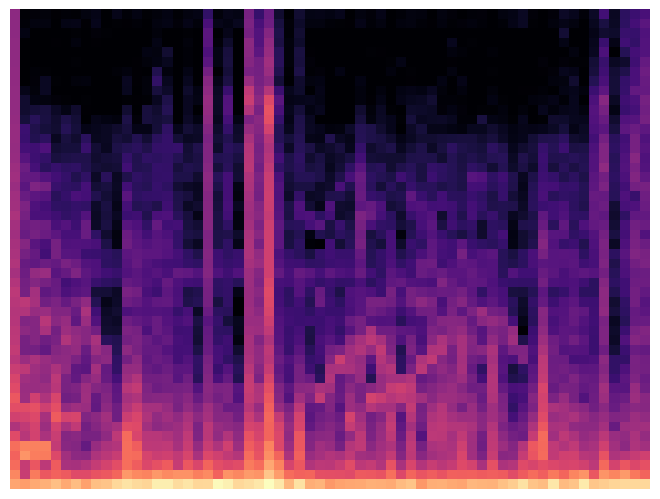

In [4]:
from IPython.display import display, clear_output
import time

def gen_img(df:pd.DataFrame):
    
    i = 0

    for idx in tqdm(range(876,df.shape[0])):
        row = df.iloc[[idx],:]

        # start_time = time.time()
        y, anno_chunk = audio_preprocessing(row)
        # print("audio processing --- %s seconds ---" % (time.time() - start_time))

        # start_time = time.time()
        result = spec2png(y,anno_chunk, window="hann")
        # print("Mel_log->png --- %s seconds ---" % (time.time() - start_time))

        i += result
        clear_output(wait=True)
        os.system('clear')

        display(row)


    return i
    
gen_img(anno_df)